Plotting the 3 Surveys in the NY Bight

In [1]:
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline 
import cartopy.crs as ccrs

import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
import cmocean.cm as cmo
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


import pandas as pd

import matplotlib.ticker as ticker


import matplotlib.gridspec as gridspec
import geopandas as gpd
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D

from scipy.ndimage.filters import gaussian_filter
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, RIVERS
import matplotlib.patches as mpatches

/var/folders/1m/h30kdd551mzgc1v42hlv1v9w0000gn/T/ipykernel_97999/1661303967.py:28: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
pwd

'/Users/alaimo/Documents/Rutgers/RoadToPhD/Chapter2/PythonNotebooks'

NEFSC

In [ ]:
fname ='nefsc_strata_arcshapefile/strata.shp'
nefsc_shape = gpd.read_file(fname) 

if nefsc_shape.crs is None:
    print("Warning: No CRS found! Assigning EPSG:4326 as a guess.")
    nefsc_shape = nefsc_shape.set_crs("EPSG:4326")  # Assign if missing

elif nefsc_shape.crs.to_string() != "EPSG:4326":
    nefsc_shape = nefsc_shape.to_crs("EPSG:4326") 

selected = [1010, 1020, 1730, 1030, 1040,1740, 1750, 1760, 1690,1700, 1710,1720]

# Select rows with STRATA in selected_strata
nefsc = nefsc_shape[nefsc_shape['STRATA'].isin(selected)]

NJDEP

In [ ]:
### Fixing the shapefile to be in the right projection
fname = 'Ocean_Trawl_Strata_20210128.shp'
njdep_shape = gpd.read_file(fname)

if njdep_shape.crs is None:
    print("Warning: No CRS found! Assigning EPSG:4326 as a guess.")
    njdep = njdep_shape.set_crs("EPSG:4326")  # Assign if missing

elif njdep_shape.crs.to_string() != "EPSG:4326":
    njdep = njdep_shape.to_crs("EPSG:4326")  # Convert projection

NEAMAP

In [ ]:
##NEMAP 
neamap_shape = gpd.read_file("neamap.shp")

if neamap_shape.crs is None:
    neamap = neamap_shape.set_crs("EPSG:4326")  # Assign if missing

elif neamap_shape.crs.to_string() != "EPSG:4326":
    neamap = neamap_shape.to_crs("EPSG:4326")  # Convert projection

In [19]:
neamap_selected = ['1','2', '3', '4', '5', '6', '7', '8', '9']

# Select rows with STRATA in selected_strata
neamap = neamap[neamap['Regions_La'].isin(neamap_selected)]

In [25]:
pwd

'/Users/alaimo/Documents/Rutgers/RoadToPhD/Chapter2/PythonNotebooks'

/Users/alaimo/opt/anaconda3/envs/squid-coldpool/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


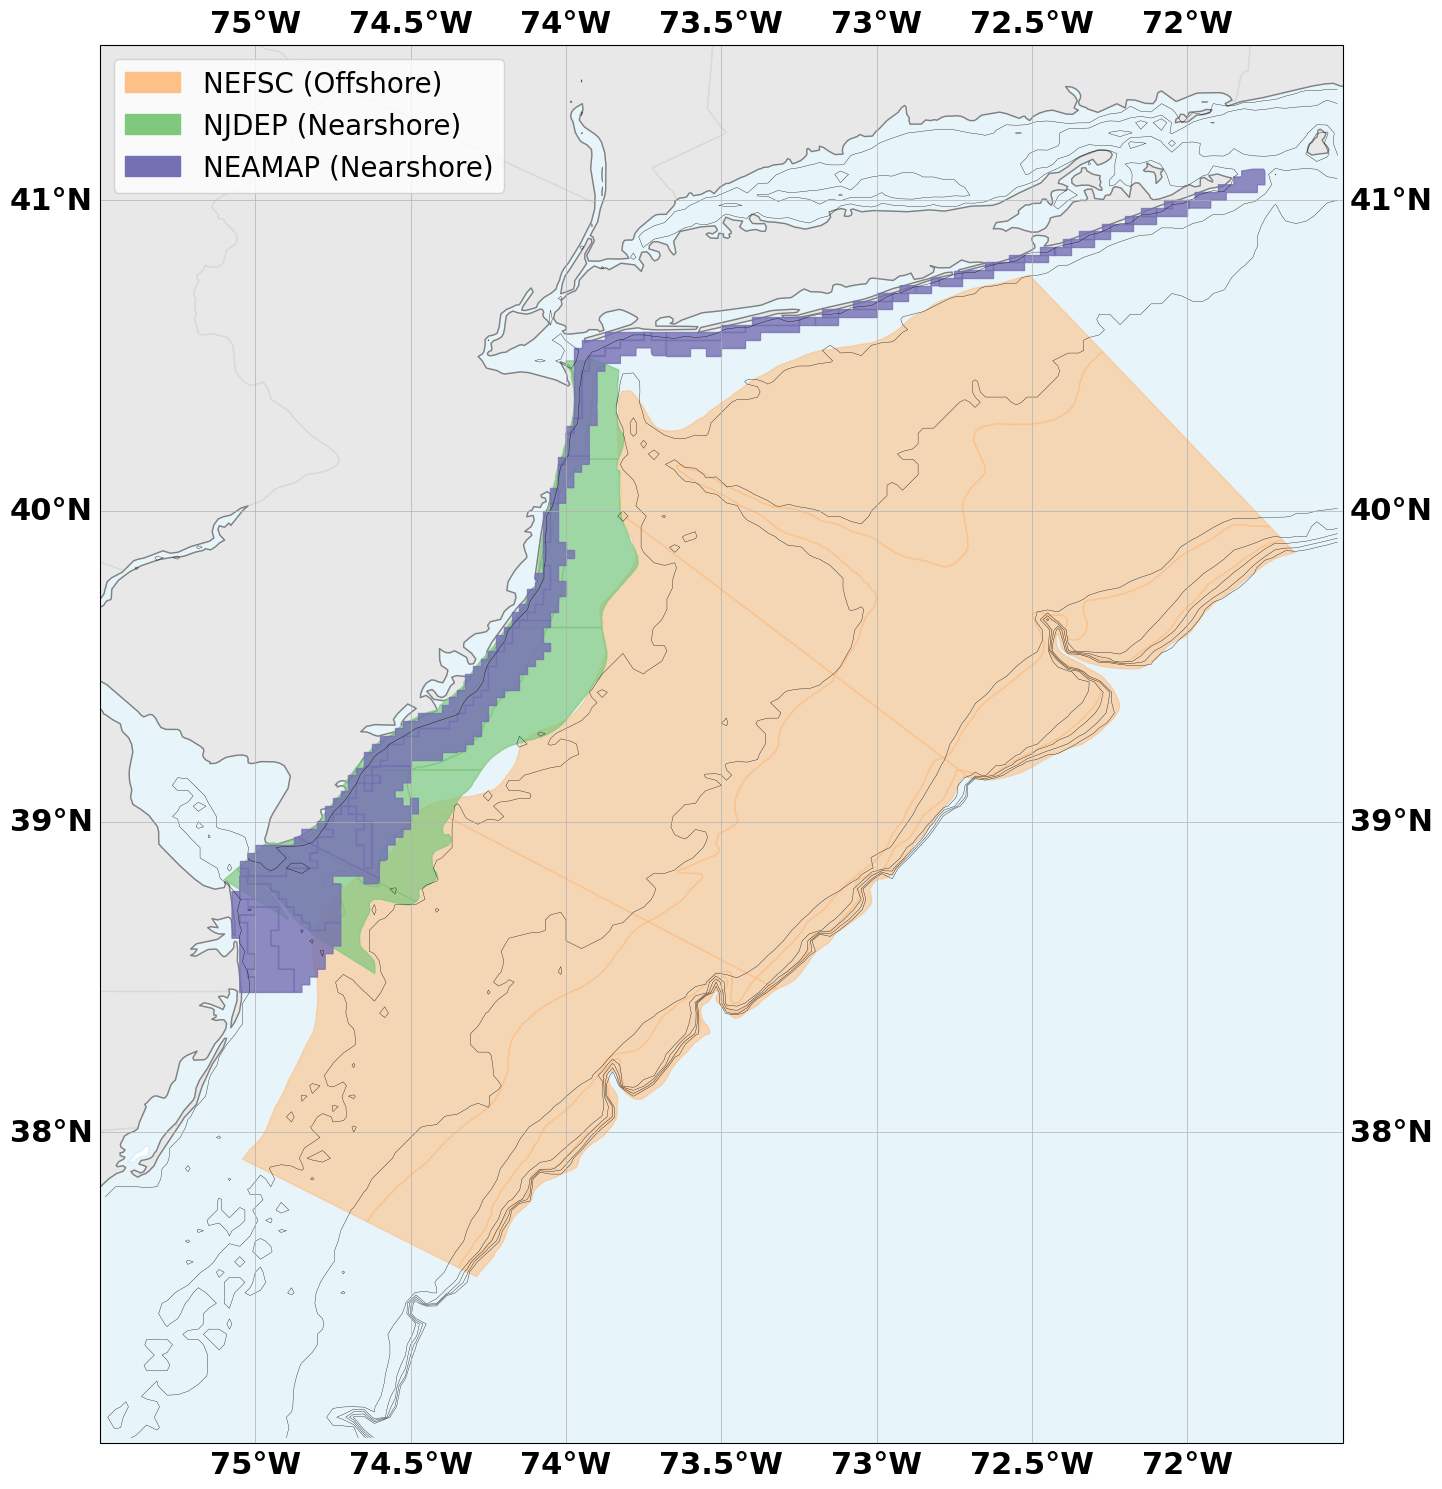

In [ ]:
fig = plt.figure(figsize=(15,15), alpha=0.25)
ax = plt.axes(projection=ccrs.PlateCarree())

## Bathymetry 
fname = "bathy_etopo2_v2c.nc"
ds_etpo = xr.open_dataset(fname)
ds_etpo

extent = [-75.5,-71.5,37.0,41.5]
ax.set_extent(extent)

# Subset bathymetry
region = ds_etpo.sel(lon=slice(extent[0], extent[1]), lat=slice(extent[2], extent[3]))

## shaded bathy
# dpth_contours = np.arange(-300,1,-10)
# bathy = ax.contourf(region.lon, region.lat, region.topo,  cmap='Greys_r' ,  transform=ccrs.PlateCarree(), levels=dpth_contours, zorder=0, extend="min")

# cbar = plt.colorbar(bathy,pad=0.05, fraction=0.03)
# cbar.set_label(label='Depth [meters]', size=22)
# cbar.ax.tick_params(labelsize=22)

## isobath contours
lvls = np.array([-300,-250,-200,-150,-100,-50,-30,-10])
ax.contour(region.lon, region.lat, region.topo, levels= lvls, colors='k', linestyles='solid', linewidths=.25,  transform=ccrs.PlateCarree())


ax.add_feature(cfeature.STATES, color="lightgrey", alpha=0.5)
ax.add_feature(cfeature.OCEAN, color="skyblue", alpha=0.2)
ax.add_feature(cfeature.COASTLINE,color='grey')

gridliner = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=.5 )
gridliner.xlabels_top = False
gridliner.ylabels_right = False
gridliner.xlabel_style = {'size': 22,'color': 'black','weight': 'bold'}
gridliner.ylabel_style = {'size': 22,'color': 'black','weight': 'bold'}

ax.plot([-69,-69], [12.5,17.75], linestyle='dashed',linewidth=6,color='tab:orange',transform=ccrs.PlateCarree())


#Okay this is where you add the shapefiles that you downloaded. you can change all kinds of things like the edge color, the face color etc. 
# ax.add_geometries(NE_selected.geometry, crs=ccrs.PlateCarree(),color="red",edgecolor="#fdc086",alpha=0.6, label="NEFSC")
ax.add_geometries(nefsc.geometry, crs=ccrs.PlateCarree(),facecolor="#fdc086",edgecolor="#fdc086",alpha=0.6, label="NEFSC")
ax.add_geometries(njdep.geometry, crs=ccrs.PlateCarree(),facecolor="#7fc97f",edgecolor="#7fc97f",alpha=0.7,label="NJDEP")
ax.add_geometries(neamap.geometry, crs=ccrs.PlateCarree(),facecolor='#7570b3',edgecolor='#7570b3',alpha=0.8,label="NEAMAP")


# Define proxy artists for the legend
nefsc_patch = mpatches.Patch(color="#fdc086", label="NEFSC (Offshore)")
njdep_patch = mpatches.Patch(color="#7fc97f", label="NJDEP (Nearshore)")
neamap_patch = mpatches.Patch(color='#7570b3', label="NEAMAP (Nearshore)")


# Add the legend with the proxy artists
ax.legend(handles=[nefsc_patch, njdep_patch, neamap_patch], loc='upper left', fontsize=20);
fig.tight_layout()
plt.savefig("../Plots/survey_maps.png")